# Pandas 

## groupby
df.groupby("컬럼명") <br>
해당 컬럼의 값에서 공통적인 값들끼리 그룹화를 시켜서 통계를 낼 수 있다

In [29]:
import pandas as pd

data = [
    {'분류': 'IT회사', '회사명': '네이버', '직군': '디자이너', '이름': '김성훈', '연봉': 5000, '연차': 3},
    {'분류': 'IT회사', '회사명': '네이버', '직군': '개발자', '이름': '양세민', '연봉': 6000, '연차': 5},
    {'분류': 'IT회사', '회사명': '카카오', '직군': '개발자', '이름': '최양미', '연봉': 6000, '연차': 5},
    {'분류': 'IT회사', '회사명': 'SK플래닛', '직군': '디자이너', '이름': '남성필', '연봉': 5500, '연차': 4},
    {'분류': '금융회사', '회사명': 'KB금융', '직군': '개발자', '이름': '강민우', '연봉': 4500, '연차': 2},  
]


df = pd.DataFrame(data)
df

,분류,회사명,직군,이름,연봉,연차
0,IT회사,네이버,디자이너,김성훈,5000,3
1,IT회사,네이버,개발자,양세민,6000,5
2,IT회사,카카오,개발자,최양미,6000,5
3,IT회사,SK플래닛,디자이너,남성필,5500,4
4,금융회사,KB금융,개발자,강민우,4500,2


In [30]:
df = df[["분류", "회사명","직군","이름","연봉","연차"]] #??
df

,분류,회사명,직군,이름,연봉,연차
0,IT회사,네이버,디자이너,김성훈,5000,3
1,IT회사,네이버,개발자,양세민,6000,5
2,IT회사,카카오,개발자,최양미,6000,5
3,IT회사,SK플래닛,디자이너,남성필,5500,4
4,금융회사,KB금융,개발자,강민우,4500,2


In [31]:
df["분류"]

0    IT회사
1    IT회사
2    IT회사
3    IT회사
4    금융회사
Name: 분류, dtype: object

In [32]:
df[["분류","회사명","직군"]]

,분류,회사명,직군
0,IT회사,네이버,디자이너
1,IT회사,네이버,개발자
2,IT회사,카카오,개발자
3,IT회사,SK플래닛,디자이너
4,금융회사,KB금융,개발자


In [33]:
#행! 가져오기!
df.loc[1]
df.

분류     IT회사
회사명     네이버
직군      개발자
이름      양세민
연봉     6000
연차        5
Name: 1, dtype: object

In [5]:
df = df.set_index("이름") #이름을 인덱스로 하겠다는 의미
df

,분류,회사명,직군,연봉,연차
이름,,,,,
김성훈,IT회사,네이버,디자이너,5000,3
양세민,IT회사,네이버,개발자,6000,5
최양미,IT회사,카카오,개발자,6000,5
남성필,IT회사,SK플래닛,디자이너,5500,4
강민우,금융회사,KB금융,개발자,4500,2


In [12]:
#특정 컬럼을 groupby를 하면 sum, mean, diff 등을 자동으로 나눠서 해줌 
group_category = df.groupby("분류") 
group_category

In [13]:
group_category.groups

{'IT회사': ['김성훈', '양세민', '최양미', '남성필'], '금융회사': ['강민우']}

In [11]:
group_category.describe()

연봉                                                                연차  \
     count    mean         std     min     25%     50%     75%     max count   
분류                                                                             
IT회사   4.0  5625.0  478.713554  5000.0  5375.0  5750.0  6000.0  6000.0   4.0   
금융회사   1.0  4500.0         NaN  4500.0  4500.0  4500.0  4500.0  4500.0   1.0   

                                                
      mean       std  min   25%  50%  75%  max  
분류                                              
IT회사  4.25  0.957427  3.0  3.75  4.5  5.0  5.0  
금융회사  2.00       NaN  2.0  2.00  2.0  2.0  2.0

In [14]:
#여러 컬럼이 아닌 특정 컬럼만 볼 수 있다
group_category["연봉"].describe()

,count,mean,std,min,25%,50%,75%,max
분류,,,,,,,,
IT회사,4.0,5625.0,478.713554,5000.0,5375.0,5750.0,6000.0,6000.0
금융회사,1.0,4500.0,NaN,4500.0,4500.0,4500.0,4500.0,4500.0


In [15]:
# 전체 통계가 아닌 특정 통계만 보는 것도 가능 
group_category.mean()

,연봉,연차
분류,,
IT회사,5625.0,4.25
금융회사,4500.0,2.00


In [16]:
group_category.sum()

,연봉,연차
분류,,
IT회사,22500,17
금융회사,4500,2


In [19]:
#그룹화는 여러컬럼도 가능하다 
group_category = df.groupby(["분류", "회사명"])
group_category.describe()

연봉                                                              \
           count    mean         std     min     25%     50%     75%     max   
분류   회사명                                                                       
IT회사 SK플래닛   1.0  5500.0         NaN  5500.0  5500.0  5500.0  5500.0  5500.0   
     네이버     2.0  5500.0  707.106781  5000.0  5250.0  5500.0  5750.0  6000.0   
     카카오     1.0  6000.0         NaN  6000.0  6000.0  6000.0  6000.0  6000.0   
금융회사 KB금융    1.0  4500.0         NaN  4500.0  4500.0  4500.0  4500.0  4500.0   

              연차                                          
           count mean       std  min  25%  50%  75%  max  
분류   회사명                                                  
IT회사 SK플래닛   1.0  4.0       NaN  4.0  4.0  4.0  4.0  4.0  
     네이버     2.0  4.0  1.414214  3.0  3.5  4.0  4.5  5.0  
     카카오     1.0  5.0       NaN  5.0  5.0  5.0  5.0  5.0  
금융회사 KB금융    1.0  2.0       NaN  2.0  2.0  2.0  2.0  2.0

In [21]:
group_category["연봉"].describe()

count    mean         std     min     25%     50%     75%     max
분류   회사명                                                                     
IT회사 SK플래닛    1.0  5500.0         NaN  5500.0  5500.0  5500.0  5500.0  5500.0
     네이버      2.0  5500.0  707.106781  5000.0  5250.0  5500.0  5750.0  6000.0
     카카오      1.0  6000.0         NaN  6000.0  6000.0  6000.0  6000.0  6000.0
금융회사 KB금융     1.0  4500.0         NaN  4500.0  4500.0  4500.0  4500.0  4500.0

## pivot_table

pd.pivot_table(df, index=["컬럼명"])<br>
여러데이터 중에서 자신이 원하는 데이터만을 가지고 원하는 행과 열에 데이터를 배치하여 새로운 보고서를 만드는 기능. <br>index와 value가 일치하는 값들의 합, 평균 등을 계산한다

In [24]:
pd.pivot_table(df, index = ["분류"])

,연봉,연차
분류,,
IT회사,5625,4.25
금융회사,4500,2.00


In [25]:
pd.pivot_table(df, index = ["분류", "회사명"])

연봉  연차
분류   회사명            
IT회사 SK플래닛  5500   4
     네이버    5500   4
     카카오    6000   5
금융회사 KB금융   4500   2

In [26]:
# 특정 value 보기
pd.pivot_table(df, index=["분류", "회사명"], values = "연봉")

연봉
분류   회사명        
IT회사 SK플래닛  5500
     네이버    5500
     카카오    6000
금융회사 KB금융   4500

## 연습

In [73]:
train = pd.read_csv("./data/train.csv", index_col="PassengerId")
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
train.loc[1:5]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###  색인
찾고자 하는 조건의 데이터를 가져올 수 있다.

In [75]:
# 0 = 사망, 1 = 생존
train[train["Survived"] == 1]. head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [76]:
train[train["Fare"]>20].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [77]:
#isin(["value","value"])는 값이 포함되었는지 확인한다. 
train[train["Embarked"].isin(["Q","S"])].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [78]:
train[train["Ticket"].str.contains("STON")].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
116,0,3,"Pekoniemi, Mr. Edvard",male,21.0,0,0,STON/O 2. 3101294,7.925,NaN,S
143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,STON/O2. 3101279,15.850,NaN,S
174,0,3,"Sivola, Mr. Antti Wilhelm",male,21.0,0,0,STON/O 2. 3101280,7.925,NaN,S
217,1,3,"Honkanen, Miss. Eliina",female,27.0,0,0,STON/O2. 3101283,7.925,NaN,S


In [79]:
train[train["Age"].isnull()].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [80]:
#나이가 50세 이상인 사람만 조회해보기 
train[train["Age"]>50].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


In [81]:
train[(train["Age"]>50) & (train["Embarked"].isin(["S","Q"]))]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,NaN,S
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S
153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S


In [82]:
#컬럼 추가

train["Date"] = "t"
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Date
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,t
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,t
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,t
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,t
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,t


In [84]:
train["FamilySize"] = train["SibSp"] + train["Parch"]+1
train[["SibSp", "Parch","FamilySize"]].head()

,SibSp,Parch,FamilySize
PassengerId,,,
1,1,0,2
2,1,0,2
3,0,0,1
4,1,0,2
5,0,0,1


In [106]:
#새로운 컬럼 추가 
train["Nationality_FR"] = train["Embarked"] == "C"
train["Nationality_UK"] = train["Embarked"].isin(["S","Q"])

In [108]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Date,FamilySize,Nationality_FR,Nationality_UK
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,t,2,False,True
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,t,2,True,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,t,1,False,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,t,2,False,True
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,t,1,False,True


In [110]:
#내가~ 행을 조회를 할건데dp~ train데이터에서 Embarked에 C있으면 Nationality라는 새로운 컬럼에 France라고 써줘 
train.loc[train["Embarked"] == "C", "Nationality"] = "France"
train.loc[train["Embarked"].isin(["S","Q"]), "Nationality"] = "England" 

In [111]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Date,FamilySize,Nationality_FR,Nationality_UK,Nationality
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,t,2,False,True,England
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,t,2,True,False,France
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,t,1,False,True,England
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,t,2,False,True,England
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,t,1,False,True,England


In [113]:
#null 값을 채워볼거에요 
#나이에서 빈값이 있는걸 확인을 했어서 평균값을 넣겠다 
mean_age = train["Age"].mean()

#내가 행조회를 할건데에~ train에서 Age에 null이 있으면  Age에 평균값을 넣어줘 
train.loc[train["Age"].isnull(), "Age"] = mean_age 
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Date,FamilySize,Nationality_FR,Nationality_UK,Nationality
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,t,2,False,True,England
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,t,2,True,False,France
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,t,1,False,True,England
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,t,2,False,True,England
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,t,1,False,True,England


# Matplotlib 

In [54]:
from matplotlib import pyplot as plt
import numpy as np

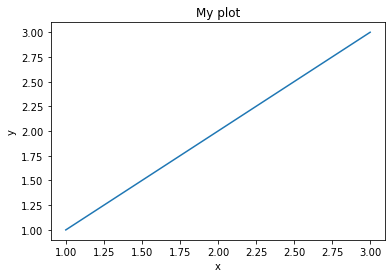

In [55]:
#간단한 직선 그래프 그리기
x = [1, 2, 3]
y = [1, 2, 3]
plt.plot(x,y) # plot이란게  직선을 그린다는 뜻 
plt.title("My plot")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

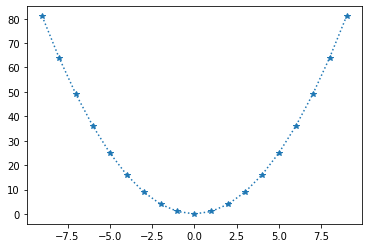

In [57]:
x = np.arange(-9, 10)
y = x**2

#라인스티알로는 '-', ':', '-.', '--' 등이 가능

plt.plot(x,y,linestyle = ":", marker ="*")
plt.show()

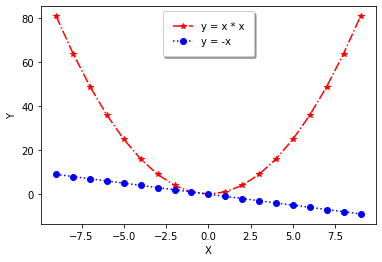

In [58]:
x = np.arange(-9,10)
y1 = x**2
y2 = -x

plt.plot(x,y1, linestyle = "-.", marker = "*", color = "red", label = "y = x * x")
plt.plot(x,y2, linestyle = ":", marker = "o", color = "blue", label = "y = -x")
plt.xlabel("X") 
plt.ylabel("Y")
plt.legend(shadow = True, borderpad = 1)
plt.show()


In [87]:
import matplotlib.pyplot as plt
import numpy as np

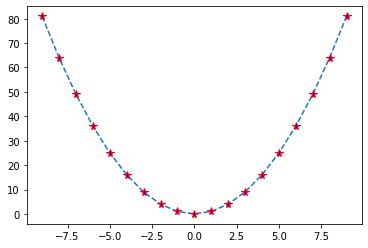

In [89]:
x = np.arange(-9, 10)
y = x**2 
plt.plot(x, y, 
        linestyle = "--",
        marker = "*",
        markersize = 8,
        markerfacecolor="blue",
        markeredgecolor="red")

plt.show()

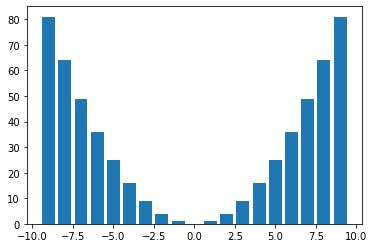

In [90]:
#막대 그래프 그릭
x = np.arange(-9,10)
plt.bar(x,x**2)
plt.show()

[array([0.0500006 , 0.80033502, 0.93366558, 0.20442956, 0.68815446,
       0.63602226, 0.97129572, 0.11592605, 0.47653865, 0.04937277]), array([0.11356428, 0.56828533, 0.09609971, 0.17291097, 0.76906872,
       0.91728083, 0.96683845, 0.10012864, 0.63831331, 0.53152007]), array([0.33822664, 0.34810686, 0.98253019, 0.76381221, 0.05570721,
       0.27750231, 0.9759817 , 0.43754122, 0.00826852, 0.50951328])]
[0 1 2 3 4 5 6 7 8 9]
data[i] [0.0500006  0.80033502 0.93366558 0.20442956 0.68815446 0.63602226
 0.97129572 0.11592605 0.47653865 0.04937277]
data[:i] []
data[i] [0.11356428 0.56828533 0.09609971 0.17291097 0.76906872 0.91728083
 0.96683845 0.10012864 0.63831331 0.53152007]
data[:i] [array([0.0500006 , 0.80033502, 0.93366558, 0.20442956, 0.68815446,
       0.63602226, 0.97129572, 0.11592605, 0.47653865, 0.04937277])]
data[i] [0.33822664 0.34810686 0.98253019 0.76381221 0.05570721 0.27750231
 0.9759817  0.43754122 0.00826852 0.50951328]
data[:i] [array([0.0500006 , 0.80033502, 0.93366

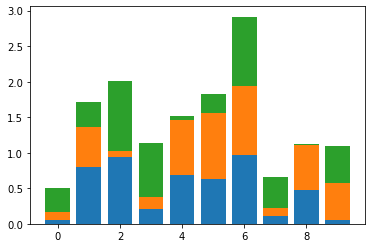

In [101]:
#누적 막대 그래프 그리기

x = np.random.rand(10) # 아래 막대
y = np.random.rand(10) # 중간 막대
z = np.random.rand(10) # 위 막대

data = [x, y, z]
print(data)

x_array= np.arange(10)
print(x_array)

for i in range(0,3): # 누적 막대의 종류가 3개
    print("data[i]",data[i])
    print("data[:i]", data[:i])
    plt.bar(
            x_array,
    data[i],
    # 누적하기 위해 bottom 업데이트
    bottom=np.sum(data[:i],axis=0))
    
plt.show()

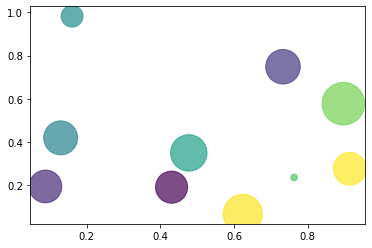

In [105]:
#스캐터 그래프 그리기 
x = np.random.rand(10)
y = np.random.rand(10)
colors = np.random.randint(0,100,10)
sizes = np.pi * 1000 * np.random.rand(10)
plt.scatter(x,y,c = colors, s = sizes, alpha = 0.7)
plt.show()